In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Carga de Archivos

In [126]:
personas_df = pd.read_csv(
    'datos/Encuesta_de_Movilidad_2019/Encuesta de Movilidad 2019/BD EODH2019 FINAL v14022020/Archivos CSV/PersonasEODH2019.csv',
    sep=';')
personas_df = personas_df[['id_hogar', 'id_persona', 'p4_edad', 'p7_id_actividad_economica', 'p11_telefono_celular', 
                           'p12_plan_datos', 'p13_realizo_desplazamiento', 'p15_responde_viajes', 'p16_cuantos_viajes', 
                           'p7v_lugar_inicio_dia', 'p10v_hora_salida', 'p11v_condujo_vehiculo', 'p13v_condujo_bicicleta', 'Sexo']]
personas_df.head()
#66820

,id_hogar,id_persona,p4_edad,p7_id_actividad_economica,p11_telefono_celular,p12_plan_datos,p13_realizo_desplazamiento,p15_responde_viajes,p16_cuantos_viajes,p7v_lugar_inicio_dia,p10v_hora_salida,p11v_condujo_vehiculo,p13v_condujo_bicicleta,Sexo
0,10005,2,57,9.0,1.0,1.0,1.0,1.0,6.0,1.0,4:20,2.0,2.0,Mujer
1,10009,2,37,7.0,1.0,2.0,2.0,4.0,0.0,NaN,NaN,NaN,NaN,Mujer
2,10015,2,35,NaN,1.0,1.0,1.0,1.0,6.0,1.0,7:50,2.0,2.0,Mujer
3,10017,2,46,17.0,1.0,1.0,1.0,1.0,2.0,1.0,6:30,2.0,2.0,Mujer
4,10006,2,50,NaN,1.0,2.0,2.0,4.0,0.0,NaN,NaN,NaN,NaN,Mujer


In [29]:
hogares_df = pd.read_csv(
    'datos/Encuesta_de_Movilidad_2019/Encuesta de Movilidad 2019/BD EODH2019 FINAL v14022020/Archivos CSV/HogaresEODH2019.csv',
    sep=';')
hogares_df = hogares_df[['Id_Hogar', 'p7_Barrio_vivienda', 'Latitud', 'Longitud', 'zat_hogar', 'p5_estrato', 'localidad']]
hogares_df.head()

,Id_Hogar,p7_Barrio_vivienda,Latitud,Longitud,zat_hogar,p5_estrato,localidad
0,10003,EL JARDIN,4.79786,-74.0445467,1036,6,SUBA
1,18369,TURBAI AYALA,4.59164,-74.0659117,481,1,UPR
2,20163,SAN PABLO SEGUNDO SECTOR,4.6006983,-74.1889142,568,2,BOSA
3,2913,BOSA CARBONELL2 SECTOT,4.6015831,-74.196758,569,2,BOSA
4,14581,GALERÍAS,4.6408383,-74.075205,287,3,TEUSAQUILLO


## Análisis Personas

In [127]:
#Total de registros: 66.820
actividades = {8:'Transporte/Almacenamiento' , 15:'Admin Publica/Seguridad', 17:'Salud'}
personas_df = personas_df[(personas_df['p7_id_actividad_economica'].isin(actividades.keys())) & 
                         (personas_df['p15_responde_viajes'] == 1)] # Respondió la encuesta de viajes
totales=[len(personas_df[personas_df['p7_id_actividad_economica']==8]),
         len(personas_df[personas_df['p7_id_actividad_economica']==15]),
         len(personas_df[personas_df['p7_id_actividad_economica']==17])]
len(personas_df)

3013

In [123]:
full_df = personas_df.merge(hogares_df, left_on='id_hogar', right_on='Id_Hogar')
len(full_df)

3013

In [35]:
full_df.columns

Index(['id_hogar', 'id_persona', 'p4_edad', 'p7_id_actividad_economica',
       'p11_telefono_celular', 'p12_plan_datos', 'p13_realizo_desplazamiento',
       'p15_responde_viajes', 'p16_cuantos_viajes', 'p7v_lugar_inicio_dia',
       'p10v_hora_salida', 'p11v_condujo_vehiculo', 'p13v_condujo_bicicleta',
       'Sexo', 'Id_Hogar', 'p7_Barrio_vivienda', 'Latitud', 'Longitud',
       'zat_hogar', 'p5_estrato', 'localidad'],
      dtype='object')

Text(0.5, 1.0, 'Distribución por Localidad - General')

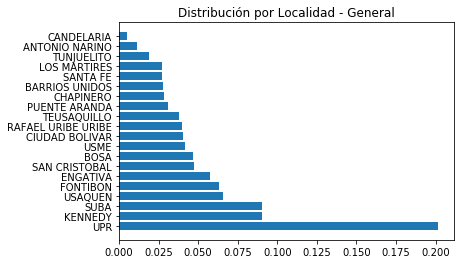

In [179]:
localidad_df = full_df['localidad'].value_counts(dropna=False).reset_index()
plt.barh(localidad_df['index'], localidad_df['localidad']/len(full_df))
plt.title('Distribución por Localidad - General')

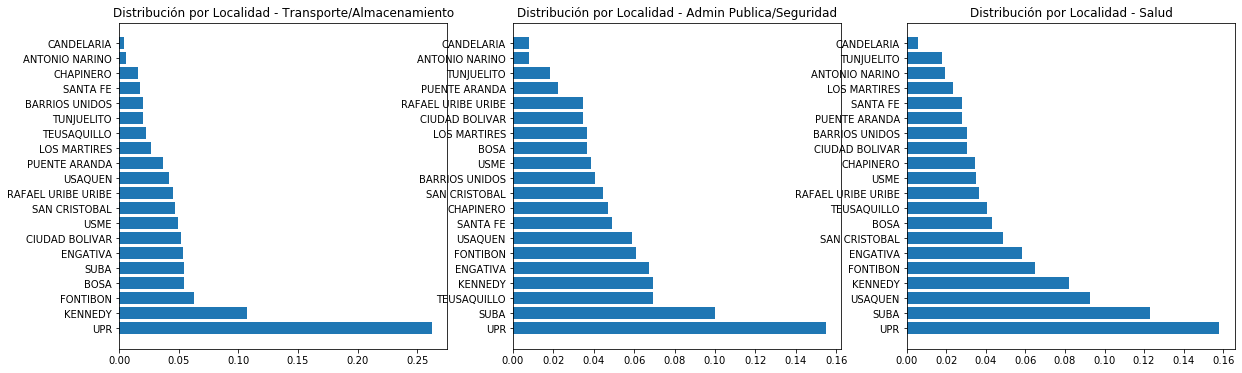

In [180]:
plt.subplots(figsize=(20,6))

for a in range(0,3) :
    plt.subplot(1,3,a+1)
    act = list(actividades.keys())[a]
    localidad_df = full_df[full_df['p7_id_actividad_economica']==act]['localidad'].value_counts(dropna=False).reset_index()
    plt.barh(localidad_df['index'], localidad_df['localidad']/totales[a])
    plt.title('Distribución por Localidad - '+ list(actividades.values())[a])

<BarContainer object of 7 artists>

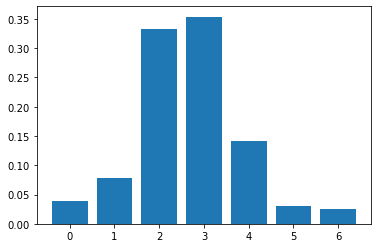

In [181]:
estrato_df = full_df['p5_estrato'].value_counts(dropna=False).reset_index()
plt.bar(estrato_df['index'], estrato_df['p5_estrato']/len(full_df))

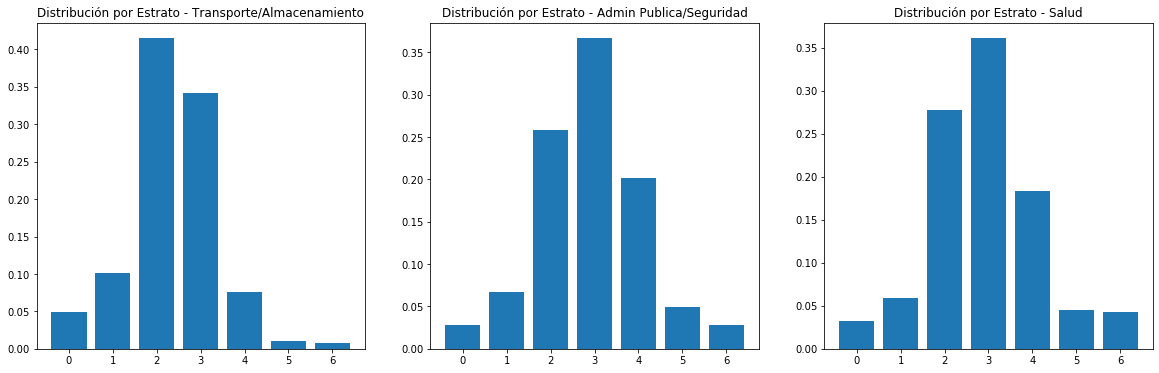

In [182]:
plt.subplots(figsize=(20,6))

for a in range(0,3) :
    plt.subplot(1,3,a+1)
    act = list(actividades.keys())[a]
    estrato_df = full_df[full_df['p7_id_actividad_economica']==act]['p5_estrato'].value_counts(dropna=False).reset_index()
    plt.bar(estrato_df['index'], estrato_df['p5_estrato']/totales[a])
    plt.title('Distribución por Estrato - '+ list(actividades.values())[a])

<BarContainer object of 67 artists>

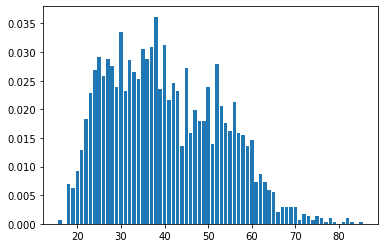

In [183]:
edad_df = full_df['p4_edad'].value_counts(dropna=False).reset_index()
plt.bar(edad_df['index'], edad_df['p4_edad']/len(full_df))

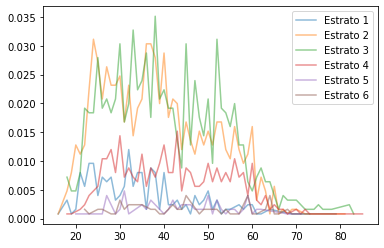

In [184]:
edest_df = full_df.groupby(['p4_edad','p5_estrato'])['id_persona'].count().reset_index()
for e in range (1,7) :
    tmp_df = edest_df[edest_df['p5_estrato'] == e]
    plt.plot(tmp_df['p4_edad'], tmp_df['id_persona']/totales[a], alpha=.5, label='Estrato '+str(e))#, color='rainbow')
    plt.legend()

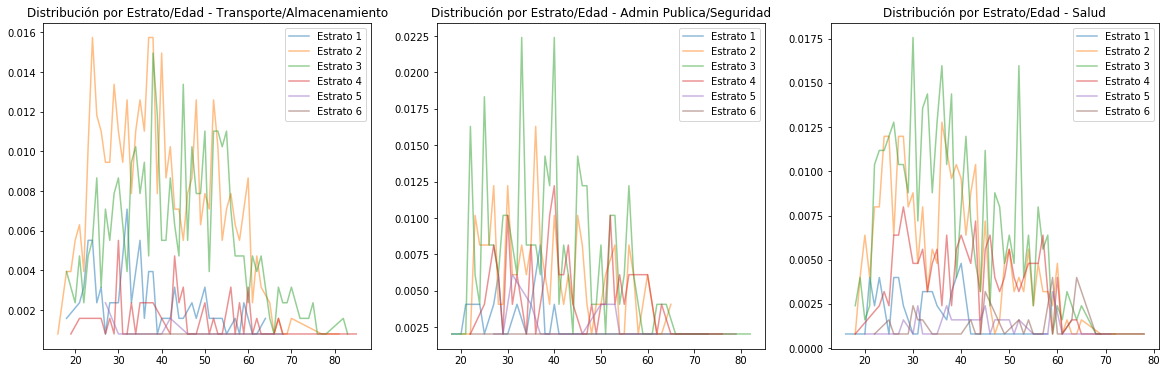

In [185]:
plt.subplots(figsize=(20,6))

for a in range(0,3) :
    plt.subplot(1,3,a+1)
    act = list(actividades.keys())[a]
    
    edest_df = full_df[full_df['p7_id_actividad_economica']==act]
    edest_df= edest_df.groupby(['p4_edad','p5_estrato'])['id_persona'].count().reset_index()
    for e in range (1,7) :
        tmp_df = edest_df[edest_df['p5_estrato'] == e]
        plt.plot(tmp_df['p4_edad'], tmp_df['id_persona']/totales[a], alpha=.5, label='Estrato '+str(e))#, color='rainbow')
    plt.legend()
    plt.title('Distribución por Estrato/Edad - '+ list(actividades.values())[a])

In [65]:
def get_hora(hora_salida) :
    return int(hora_salida.split(':')[0])

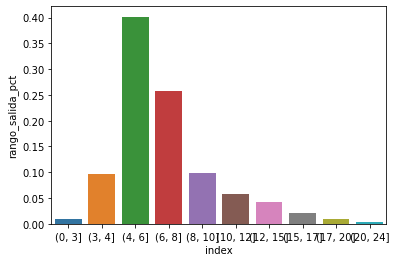

In [239]:
# Bin hour intervals
full_df['hora_salida'] = full_df['p10v_hora_salida'].apply(get_hora)
full_df['rango_salida']=pd.cut(full_df['hora_salida'],[0,3,4,6,8,10,12,15,17,20,24])

hora_df = full_df['rango_salida'].value_counts(dropna=False).reset_index()
hora_df['rango_salida_pct']=hora_df['rango_salida']/len(full_df)
sns.barplot(data=hora_df, x='index', y='rango_salida_pct')

In [244]:
full_df

,id_hogar,id_persona,p4_edad,p7_id_actividad_economica,p11_telefono_celular,p12_plan_datos,p13_realizo_desplazamiento,p15_responde_viajes,p16_cuantos_viajes,p7v_lugar_inicio_dia,...,Id_Hogar,p7_Barrio_vivienda,Latitud,Longitud,zat_hogar,p5_estrato,localidad,hora_salida,rango_salida,hora_salida_mil
0,10017,2,46,17.0,1.0,1.0,1.0,1.0,2.0,1.0,...,10017,MAZUREN,4.7376948,-74.0520964,66,4,SUBA,6,"(4, 6]",630
1,10030,2,57,8.0,1.0,1.0,1.0,1.0,4.0,1.0,...,10030,LA LIBERIA,4.7384483,-74.0368631,61,4,USAQUEN,5,"(4, 6]",540
2,10063,3,22,17.0,1.0,1.0,1.0,1.0,2.0,1.0,...,10063,LA FRAGUA,4.5959399,-74.1099132,503,3,ANTONIO NARINO,12,"(10, 12]",12
3,10093,2,57,17.0,1.0,2.0,1.0,1.0,3.0,1.0,...,10093,SAN GRABRIEL,4.6234,-74.1184,379,3,PUENTE ARANDA,8,"(6, 8]",815
4,1010,3,29,17.0,1.0,2.0,1.0,1.0,2.0,1.0,...,1010,AURES 2,4.7499067,-74.1114017,112,2,SUBA,10,"(8, 10]",10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3008,P04786,1,50,17.0,1.0,1.0,1.0,1.0,4.0,1.0,...,P04786,GUSTAVO RESTREPO,4.57567909923,-74.1082819101,591,3,RAFAEL URIBE URIBE,8,"(6, 8]",800
3009,P05288,4,50,17.0,1.0,1.0,1.0,1.0,3.0,1.0,...,P05288,MAZUREN,4.7372241639,-74.0587908903,66,4,SUBA,6,"(4, 6]",600
3010,P05870,2,45,17.0,1.0,1.0,1.0,1.0,4.0,1.0,...,P05870,PONTEVEDRA,4.69632720757,-74.0779550219,135,4,SUBA,8,"(6, 8]",800
3011,P05938,1,37,17.0,1.0,1.0,1.0,1.0,3.0,1.0,...,P05938,VILLA MAYOR LA NUEVA,4.58945837703,-74.1259502612,578,3,RAFAEL URIBE URIBE,7,"(6, 8]",700


In [248]:
full_df[['p10v_hora_salida','hora_salida_mil']]

,p10v_hora_salida,hora_salida_mil
0,6:30,630
1,5:40,540
2,12:00,1200
3,8:15,815
4,10:20,1020
...,...,...
3008,8:00,800
3009,6:00,600
3010,8:00,800
3011,7:00,700


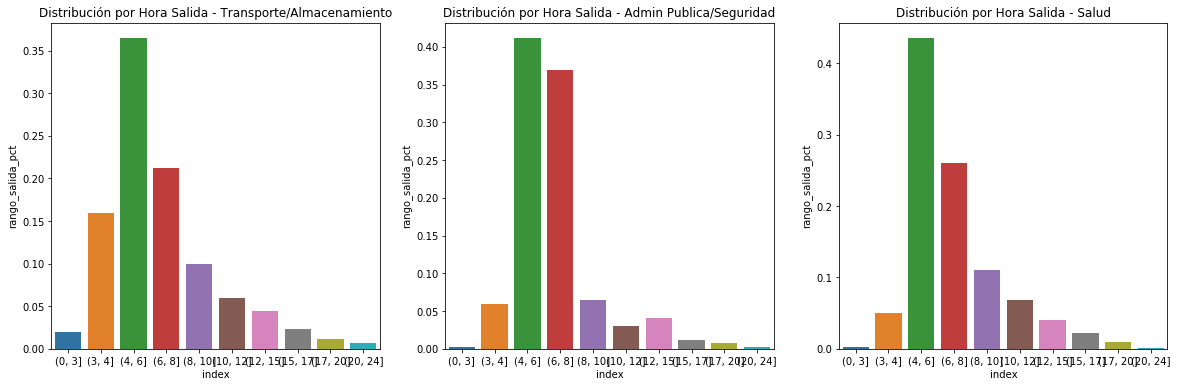

In [187]:
plt.subplots(figsize=(20,6))

for a in range(0,3) :
    plt.subplot(1,3,a+1)
    act = list(actividades.keys())[a]
    hora_df = full_df[full_df['p7_id_actividad_economica']==act]['rango_salida'].value_counts(dropna=False).reset_index()
    hora_df['rango_salida_pct']=hora_df['rango_salida']/totales[a]
    sns.barplot(data=hora_df, x='index', y='rango_salida_pct')
    plt.title('Distribución por Hora Salida - '+ list(actividades.values())[a])

# Análisis de Viajes

In [174]:
viajes_df = pd.read_csv(
    'datos/Encuesta_de_Movilidad_2019/Encuesta de Movilidad 2019/BD EODH2019 FINAL v14022020/Archivos CSV/ViajesEODH2019_fix.csv')
viajes_df = viajes_df[['id_hogar', 'id_persona', 'id_viaje', 'lugar_origen', 'zat_origen', 'p17_Id_motivo_viaje', 
                       'hora_inicio_viaje', 'p28_lugar_destino', 'zat_destino', 'p30_camino_cuadras', 'p30_camino_minutos', 
                       'p31_hora_llegada', 'modo_principal', 'modo_principal_desagregado']]
viajes_df.head()

,id_hogar,id_persona,id_viaje,lugar_origen,zat_origen,p17_Id_motivo_viaje,hora_inicio_viaje,p28_lugar_destino,zat_destino,p30_camino_cuadras,p30_camino_minutos,p31_hora_llegada,modo_principal,modo_principal_desagregado
0,33754,2,1,1.0,204.0,5,8:00:00,2.0,554.0,5.0,5.0,8:30:00,SITP Provisional,SITP - Provisional
1,33770,2,3,2.0,299.0,6,15:00:00,1.0,973.0,2.0,3.0,16:00:00,Transporte informal,Bus/buseta informal/pirata/Chana
2,3882,3,1,1.0,551.0,1,6:00:00,2.0,324.0,4.0,15.0,7:30:00,SITP Zonal,SITP - Urbano (Azul)
3,5189,4,1,1.0,17.0,1,8:00:00,2.0,7.0,5.0,5.0,8:20:00,SITP Zonal,SITP - Urbano (Azul)
4,5636,2,2,2.0,554.0,6,17:00:00,1.0,933.0,2.0,3.0,18:30:00,Transporte informal,Bus/buseta informal/pirata/Chana


# Unión Viajes y Datos

In [316]:
#Unir a datos originales:
full_viajes_df = viajes_df.merge(full_df, on=['id_hogar','id_persona'])
full_viajes_df.head()

,id_hogar,id_persona,id_viaje,lugar_origen,zat_origen,p17_Id_motivo_viaje,hora_inicio_viaje,p28_lugar_destino,zat_destino,p30_camino_cuadras,...,Id_Hogar,p7_Barrio_vivienda,Latitud,Longitud,zat_hogar,p5_estrato,localidad,hora_salida,rango_salida,hora_salida_mil
0,3163,1,2,2.0,1500.0,6,17:00:00,1.0,621.0,2.0,...,3163,EL ENSUEÑO,4.5838917,-74.160865,621,2,CIUDAD BOLIVAR,5,"(4, 6]",510
1,3163,1,1,1.0,621.0,1,5:10:00,2.0,1500.0,0.0,...,3163,EL ENSUEÑO,4.5838917,-74.160865,621,2,CIUDAD BOLIVAR,5,"(4, 6]",510
2,12801,2,2,2.0,177.0,6,19:00:00,1.0,466.0,0.0,...,12801,SOCIEGO ALTO,4.58001339117,-74.0898519284,466,3,SAN CRISTOBAL,11,"(10, 12]",1100
3,12801,2,1,1.0,466.0,1,11:00:00,2.0,177.0,4.0,...,12801,SOCIEGO ALTO,4.58001339117,-74.0898519284,466,3,SAN CRISTOBAL,11,"(10, 12]",1100
4,31591,2,1,1.0,465.0,12,12:00:00,2.0,453.0,5.0,...,31591,LAS BRISAS,4.5832117,-74.0811733,465,2,SAN CRISTOBAL,12,"(10, 12]",1200


In [317]:
print(len(full_viajes_df))
full_viajes_df = full_viajes_df[full_viajes_df['p17_Id_motivo_viaje'].isin([1, 2, 6, 15])]
print(len(full_viajes_df))

7581
6070


In [318]:
full_viajes_df.loc[full_viajes_df['p17_Id_motivo_viaje']==1, 'p17_Id_motivo_viaje'] = 'TRABAJAR'
full_viajes_df.loc[full_viajes_df['p17_Id_motivo_viaje']==2, 'p17_Id_motivo_viaje'] = 'ASUNTOS TRABAJO'
full_viajes_df.loc[full_viajes_df['p17_Id_motivo_viaje']==6, 'p17_Id_motivo_viaje'] = 'VOLVER CASA'
full_viajes_df.loc[full_viajes_df['p17_Id_motivo_viaje']==15, 'p17_Id_motivo_viaje'] = 'CUIDADO PERSONAS'

In [319]:
tot_viajes=[len(full_viajes_df[full_viajes_df['p7_id_actividad_economica']==8]),
         len(full_viajes_df[full_viajes_df['p7_id_actividad_economica']==15]),
         len(full_viajes_df[full_viajes_df['p7_id_actividad_economica']==17])]
tot_viajes

[2554, 1002, 2514]

Text(0.5, 1.0, 'Distribución por Motivo Viaje - General')

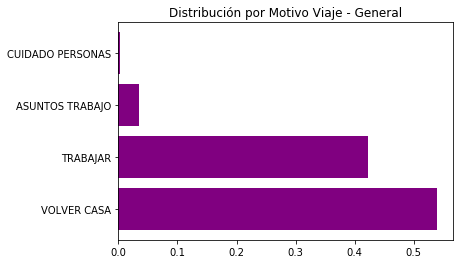

In [212]:
#Análisis Motivo Viaje
motivo_df = full_viajes_df['p17_Id_motivo_viaje'].value_counts(dropna=False).reset_index()
plt.barh(motivo_df['index'], motivo_df['p17_Id_motivo_viaje']/len(full_viajes_df), color='purple')
plt.title('Distribución por Motivo Viaje - General')

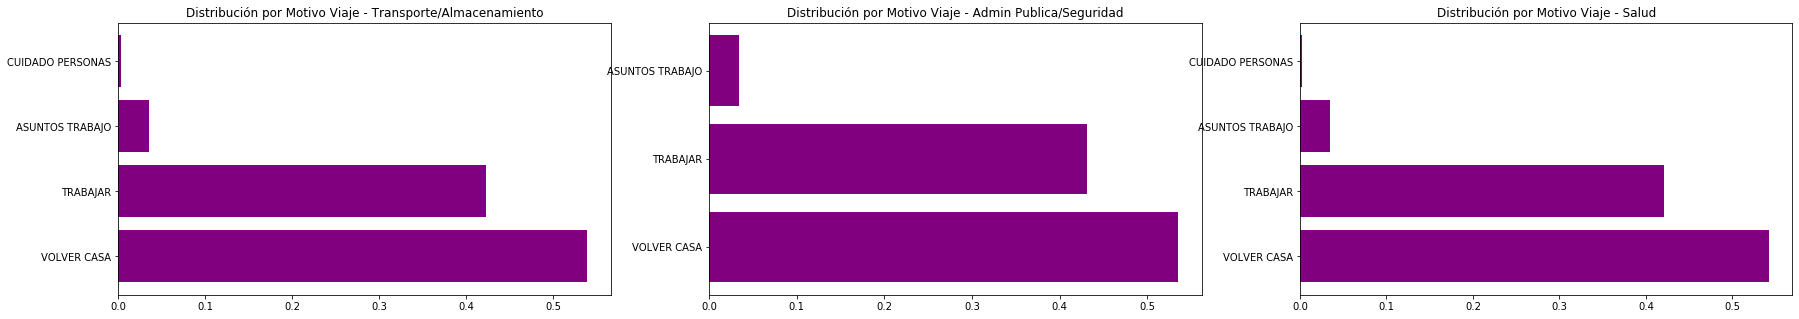

In [217]:
plt.subplots(figsize=(30,5))

for a in range(0,3) :
    plt.subplot(1,3,a+1)
    act = list(actividades.keys())[a]
    motivo_df = full_viajes_df[full_viajes_df['p7_id_actividad_economica']==act]['p17_Id_motivo_viaje'].value_counts(dropna=False).reset_index()
    plt.barh(motivo_df['index'], motivo_df['p17_Id_motivo_viaje']/tot_viajes[a], color='purple')
    plt.title('Distribución por Motivo Viaje - '+ list(actividades.values())[a])

In [246]:
def get_hora_mil(hora_salida) :
    hora_mil = hora_salida.replace(':','')
    if len(hora_mil) > 4 :
        hora_mil = hora_mil[:-2]
    return int(hora_mil)

In [320]:
# Bin hour intervals
full_viajes_df['hora_inicio'] = full_viajes_df['hora_inicio_viaje'].apply(get_hora_mil)
full_viajes_df['rango_inicio']=pd.cut(full_viajes_df['hora_inicio'],[0,300,400,600,800,1000,1200,1500,1700,2000,2400])

full_viajes_df['hora_llegada'] = full_viajes_df['p31_hora_llegada'].apply(get_hora_mil)
full_viajes_df['rango_llegada']=pd.cut(full_viajes_df['hora_llegada'],[0,300,400,600,800,1000,1200,1500,1700,2000,2400])

Text(0.5, 1.0, 'Distribución hora llegada - General')

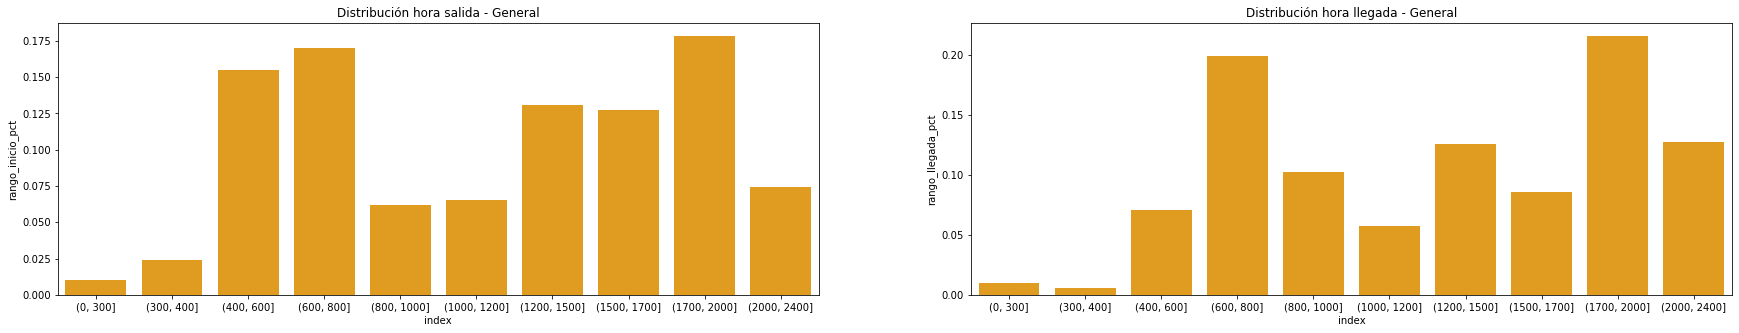

In [258]:
plt.subplots(figsize=(30,5))

plt.subplot(121)
hora_df = full_viajes_df['rango_inicio'].value_counts(dropna=False).reset_index()
hora_df['rango_inicio_pct']=hora_df['rango_inicio']/len(full_viajes_df)
sns.barplot(data=hora_df, x='index', y='rango_inicio_pct', color='orange')
plt.title('Distribución hora salida - General')

plt.subplot(122)
hora_df = full_viajes_df['rango_llegada'].value_counts(dropna=False).reset_index()
hora_df['rango_llegada_pct']=hora_df['rango_llegada']/len(full_viajes_df)
sns.barplot(data=hora_df, x='index', y='rango_llegada_pct', color='orange')
plt.title('Distribución hora llegada - General')

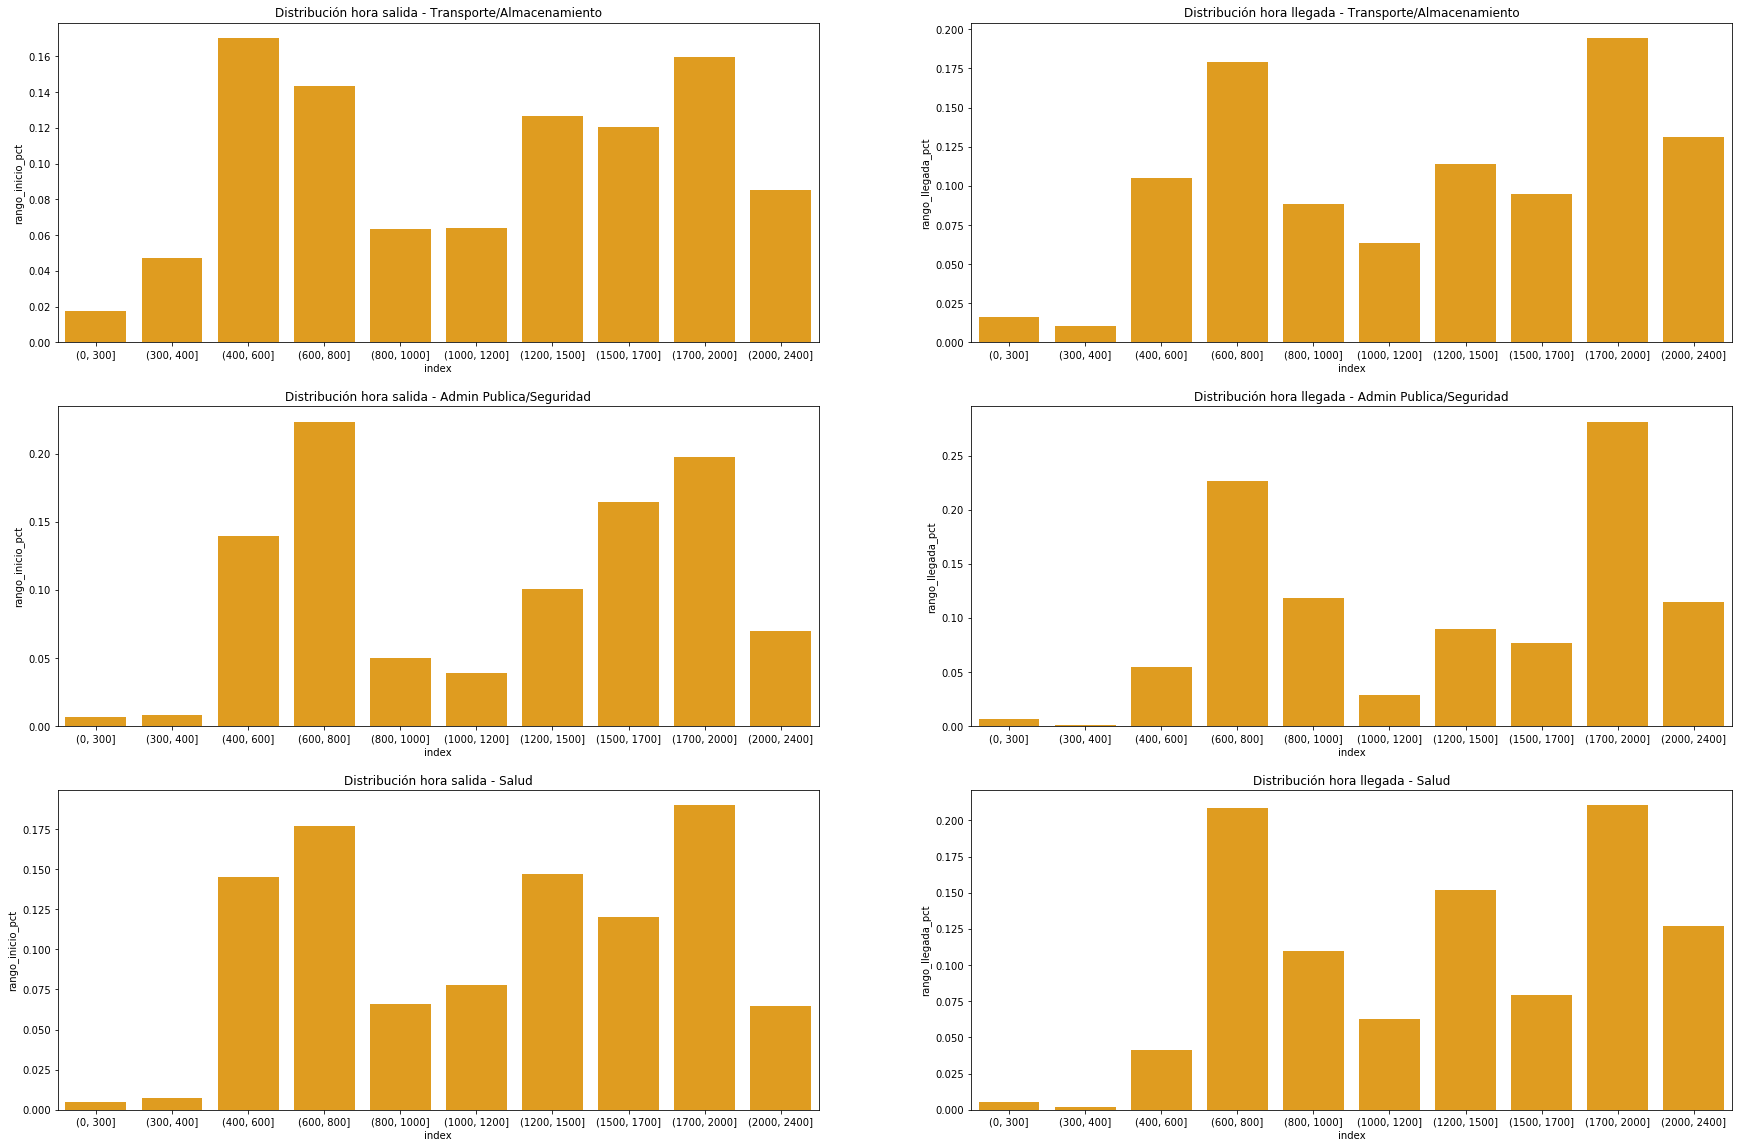

In [237]:
plt.subplots(figsize=(30,20))

for a in range(0,3) :
    act = list(actividades.keys())[a]
    plt.subplot(3,2,2*a+1)
    hora_df = full_viajes_df[full_viajes_df['p7_id_actividad_economica']==act]['rango_inicio'].value_counts(dropna=False).reset_index()
    hora_df['rango_inicio_pct']=hora_df['rango_inicio']/tot_viajes[a]
    sns.barplot(data=hora_df, x='index', y='rango_inicio_pct', color='orange')
    plt.title('Distribución hora salida - '+list(actividades.values())[a])

    plt.subplot(3,2,2*a+2)
    hora_df = full_viajes_df[full_viajes_df['p7_id_actividad_economica']==act]['rango_llegada'].value_counts(dropna=False).reset_index()
    hora_df['rango_llegada_pct']=hora_df['rango_llegada']/tot_viajes[a]
    sns.barplot(data=hora_df, x='index', y='rango_llegada_pct', color='orange')
    plt.title('Distribución hora llegada - '+list(actividades.values())[a])

In [311]:
def get_duracion(row):
#Recibe las horas completas, hh:mm:ss
    hora_ini=row[0]
    hora_fin=row[1]
    if int(hora_fin.replace(':','')) < int(hora_ini.replace(':','')) :
        dia = 2
    else :
        dia = 1
    ini=hora_ini.split(':')
    fin=hora_fin.split(':')
    a = datetime.datetime(2020, 1, 1, int(ini[0]), int(ini[1]), int(ini[2])) 
    b = datetime.datetime(2020, 1, dia, int(fin[0]), int(fin[1]), int(fin[2]))
    
    return round((b-a).seconds/3600)

In [313]:
get_duracion(['20:56:00', '00:54:00'])

4

In [321]:
full_viajes_df['duracion']=full_viajes_df[['hora_inicio_viaje','p31_hora_llegada']].apply(get_duracion, axis=1)
full_viajes_df[['hora_inicio_viaje','p31_hora_llegada','duracion']]

,hora_inicio_viaje,p31_hora_llegada,duracion
0,17:00:00,18:45:00,2
1,5:10:00,7:00:00,2
2,19:00:00,20:00:00,1
3,11:00:00,13:00:00,2
6,21:00:00,22:00:00,1
...,...,...,...
7574,6:00:00,21:00:00,15
7576,10:25:00,10:40:00,0
7578,13:30:00,13:33:00,0
7579,6:30:00,7:15:00,1


In [322]:
full_viajes_df['duracion'].describe()

count    6070.000000
mean        1.030972
std         1.446023
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max        18.000000
Name: duracion, dtype: float64

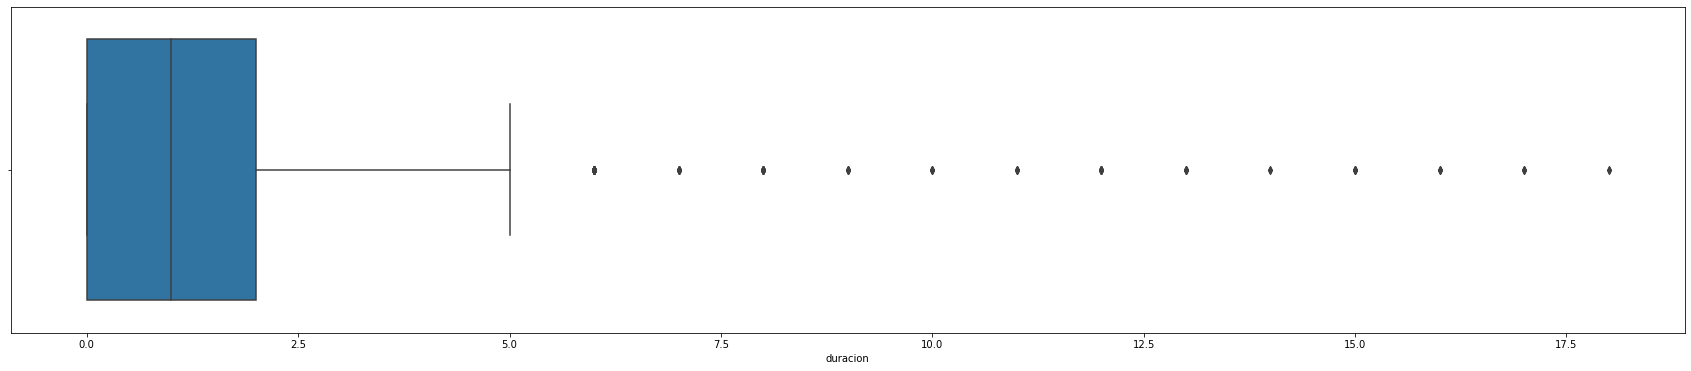

In [324]:
# Checking outliers
plt.subplots(figsize=(30,6))
sns.boxplot(full_viajes_df['duracion'])
#plt.xlim(0,2000)

In [325]:
len(full_viajes_df[full_viajes_df['duracion']>5])

90

In [294]:
full_viajes_df[full_viajes_df['duracion']>1000]

,id_hogar,id_persona,id_viaje,lugar_origen,zat_origen,p17_Id_motivo_viaje,hora_inicio_viaje,p28_lugar_destino,zat_destino,p30_camino_cuadras,...,zat_hogar,p5_estrato,localidad,hora_salida,rango_salida,hora_inicio,rango_inicio,hora_llegada,rango_llegada,duracion
22,11204,3,2,2.0,939.0,VOLVER CASA,4:15:00,1.0,755.0,0.0,...,755,1,USME,4,"(3, 4]",415,"(400, 600]",2130,"(2000, 2400]",1035
2038,20105,1,1,2.0,375.0,VOLVER CASA,4:00:00,1.0,773.0,2.0,...,773,3,UPR,4,"(3, 4]",400,"(300, 400]",2100,"(2000, 2400]",1020
3098,337,1,3,2.0,62.0,VOLVER CASA,0:15:00,1.0,677.0,0.0,...,677,2,TUNJUELITO,7,"(6, 8]",15,"(0, 300]",1800,"(1700, 2000]",1065
3609,2967,1,2,2.0,628.0,VOLVER CASA,4:20:00,1.0,663.0,0.0,...,663,2,CIUDAD BOLIVAR,4,"(3, 4]",420,"(400, 600]",2200,"(2000, 2400]",1060
6509,11575,3,1,2.0,782.0,TRABAJAR,4:30:00,1.0,785.0,5.0,...,785,0,UPR,4,"(3, 4]",430,"(400, 600]",2130,"(2000, 2400]",1020


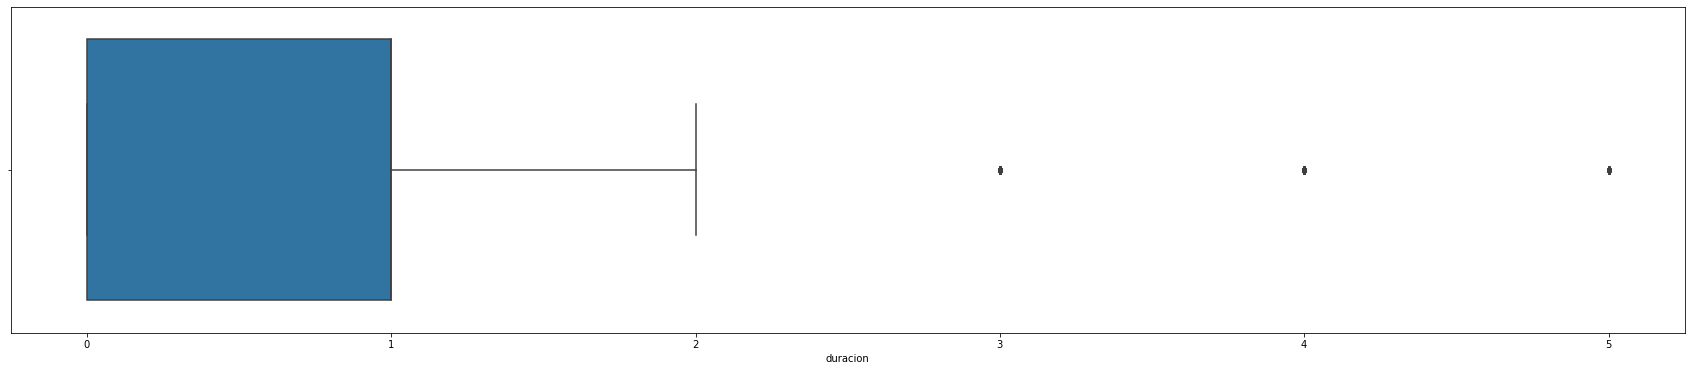

In [326]:
# Checking outliers
plt.subplots(figsize=(30,6))
full_viajes_df = full_viajes_df[full_viajes_df['duracion']<=5]
sns.boxplot(full_viajes_df['duracion'])
#plt.xlim(0,2000)

Text(0.5, 1.0, 'Distribución Duración - General')

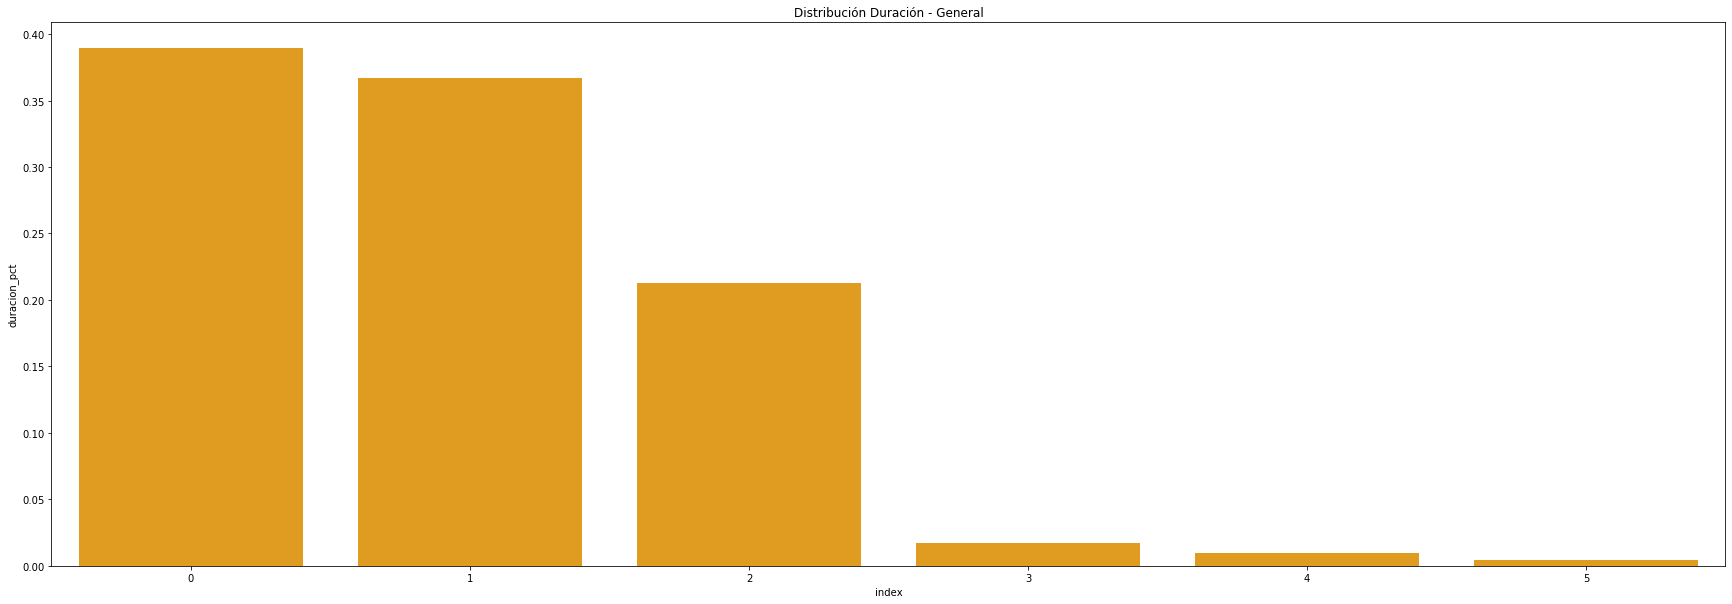

In [327]:
plt.subplots(figsize=(30,10))
duracion_df = full_viajes_df['duracion'].value_counts(dropna=False).reset_index()
duracion_df['duracion_pct']=duracion_df['duracion']/len(full_viajes_df)
sns.barplot(data=duracion_df, x='index', y='duracion_pct', color='orange')
plt.title('Distribución Duración - General')

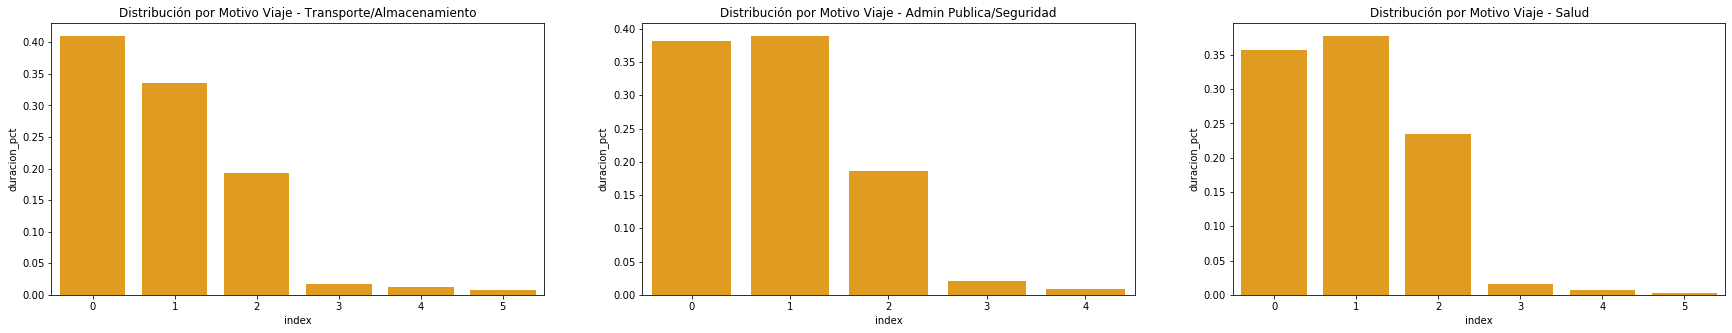

In [329]:
plt.subplots(figsize=(30,5))

for a in range(0,3) :
    plt.subplot(1,3,a+1)
    act = list(actividades.keys())[a]
    duracion_df = full_viajes_df[full_viajes_df['p7_id_actividad_economica']==act]['duracion'].value_counts(dropna=False).reset_index()
    duracion_df['duracion_pct']=duracion_df['duracion']/tot_viajes[a]
    sns.barplot(data=duracion_df, x='index', y='duracion_pct', color='orange')
    plt.title('Distribución por Motivo Viaje - '+ list(actividades.values())[a])

Text(0.5, 1.0, 'Distribución Modo - General')

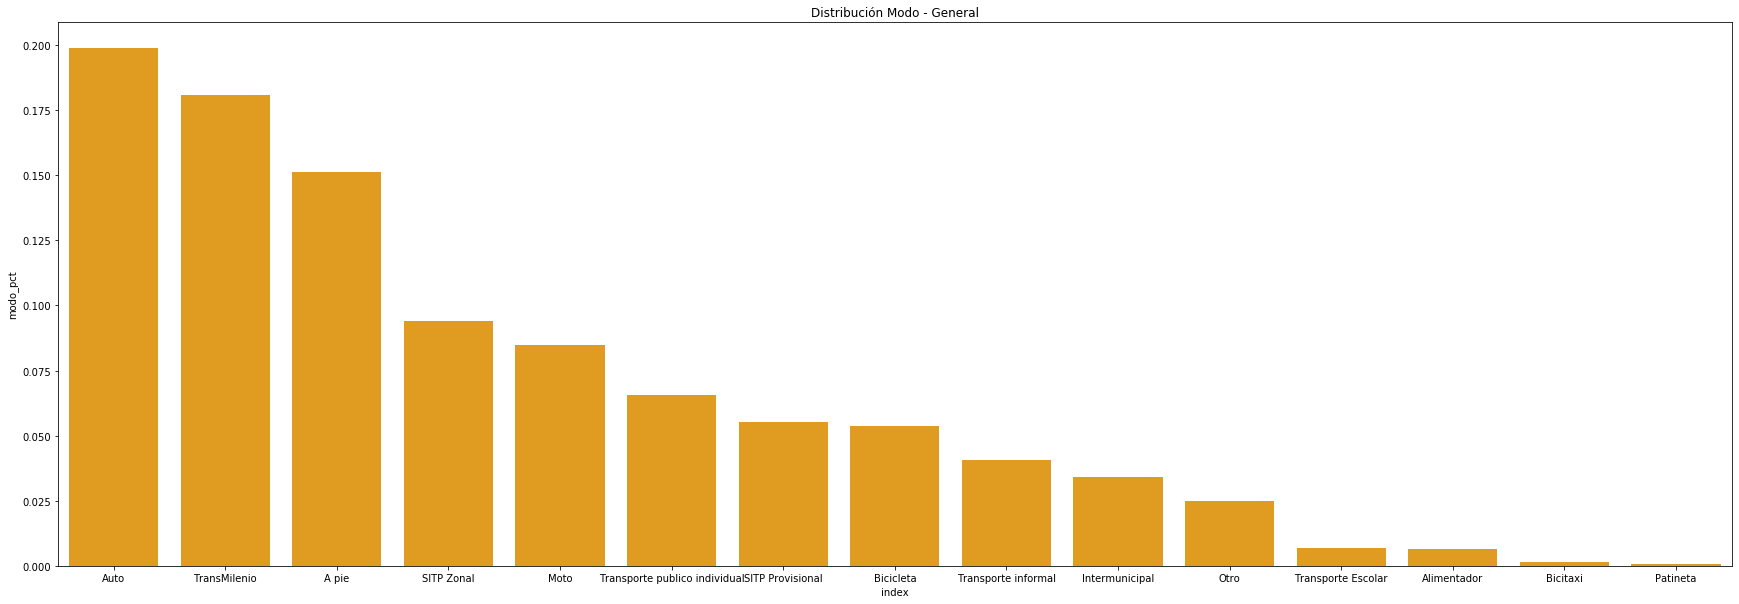

In [331]:
plt.subplots(figsize=(30,10))
modo_df = full_viajes_df['modo_principal'].value_counts(dropna=False).reset_index()
modo_df['modo_pct']=modo_df['modo_principal']/len(full_viajes_df)
sns.barplot(data=modo_df, x='index', y='modo_pct', color='orange')
plt.title('Distribución Modo - General')

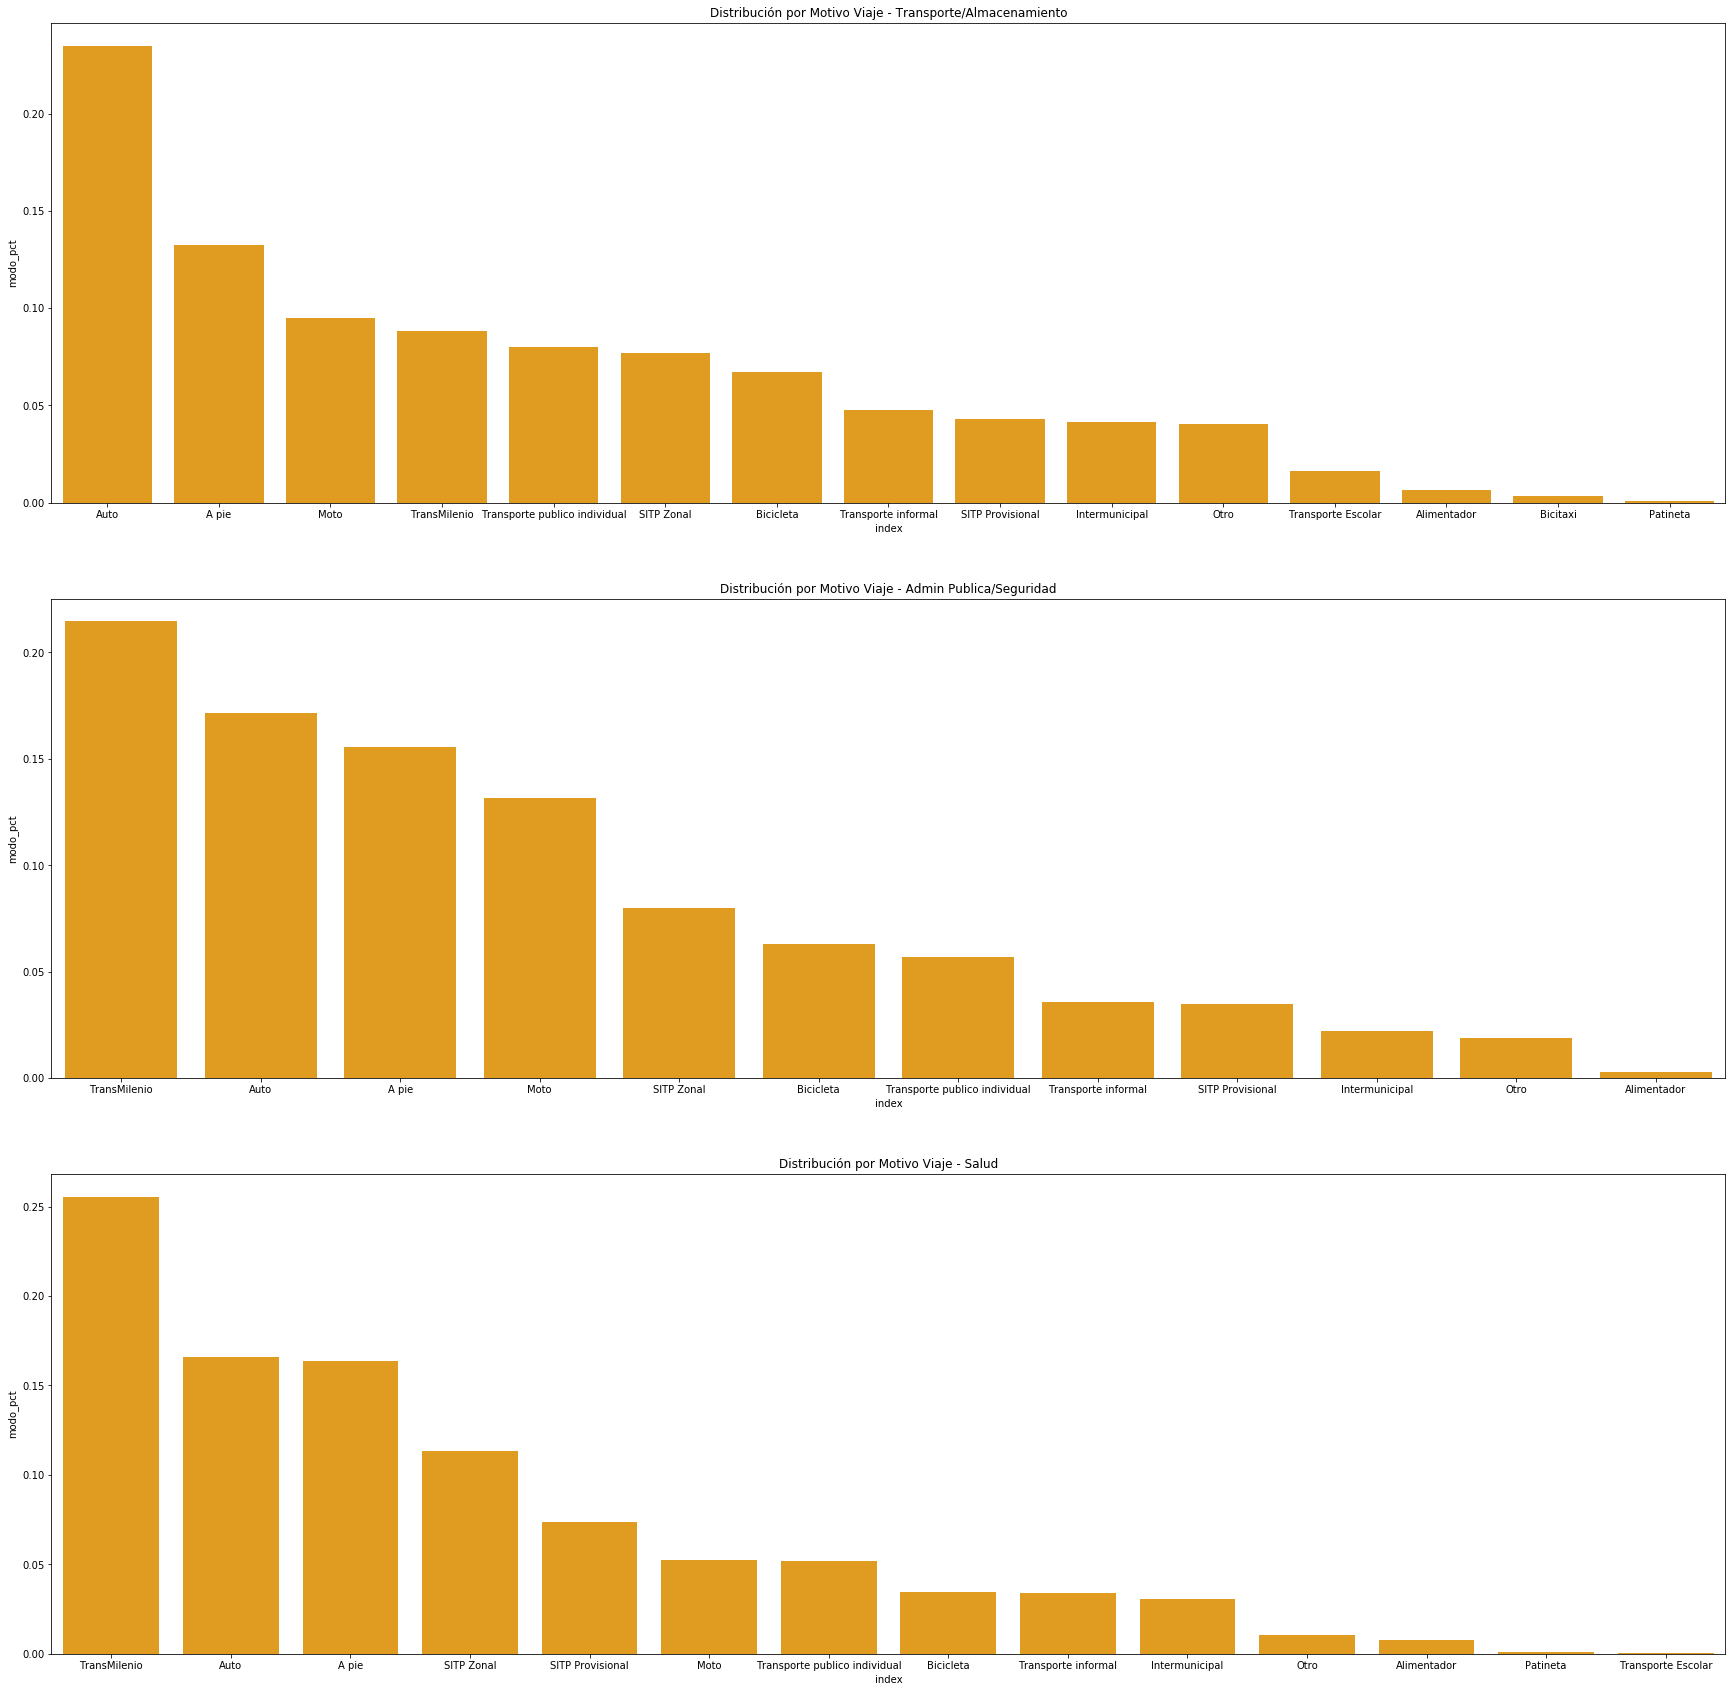

In [334]:
plt.subplots(figsize=(30,30))

for a in range(0,3) :
    plt.subplot(3,1,a+1)
    act = list(actividades.keys())[a]
    modo_df = full_viajes_df[full_viajes_df['p7_id_actividad_economica']==act]['modo_principal'].value_counts(dropna=False).reset_index()
    modo_df['modo_pct']=modo_df['modo_principal']/tot_viajes[a]
    sns.barplot(data=modo_df, x='index', y='modo_pct', color='orange')
    plt.title('Distribución por Motivo Viaje - '+ list(actividades.values())[a])

## Unir a Viajes Georeferenciación

In [340]:
zat_df = pd.read_csv('datos/ZAT_Mod.csv')
zat_df['coordenadas'] = [[c.split(',')[0], c.split(',')[1]] for c in zat_df['Point_CG']]
zat_df = zat_df[['Zona_Num_N', 'coordenadas']]
zat_df

,Zona_Num_N,coordenadas
0,812,"[4.96182768262, -74.4839713826]"
1,808,"[4.6989580555, -73.9219270317]"
2,803,"[4.77444455014, -74.2585740836]"
3,559,"[4.62382899457, -74.2180577773]"
4,1,"[4.79992899747, -74.0704548132]"
...,...,...
943,938,"[4.70051251503, -74.2130265983]"
944,901,"[4.71648368508, -74.2099536468]"
945,925,"[4.75576557204, -74.1772932292]"
946,924,"[4.73917573544, -74.1650976469]"


In [336]:
full_viajes_df.columns

Index(['id_hogar', 'id_persona', 'id_viaje', 'lugar_origen', 'zat_origen',
       'p17_Id_motivo_viaje', 'hora_inicio_viaje', 'p28_lugar_destino',
       'zat_destino', 'p30_camino_cuadras', 'p30_camino_minutos',
       'p31_hora_llegada', 'modo_principal', 'modo_principal_desagregado',
       'p4_edad', 'p7_id_actividad_economica', 'p11_telefono_celular',
       'p12_plan_datos', 'p13_realizo_desplazamiento', 'p15_responde_viajes',
       'p16_cuantos_viajes', 'p7v_lugar_inicio_dia', 'p10v_hora_salida',
       'p11v_condujo_vehiculo', 'p13v_condujo_bicicleta', 'Sexo', 'Id_Hogar',
       'p7_Barrio_vivienda', 'Latitud', 'Longitud', 'zat_hogar', 'p5_estrato',
       'localidad', 'hora_salida', 'rango_salida', 'hora_salida_mil',
       'hora_inicio', 'rango_inicio', 'hora_llegada', 'rango_llegada',
       'duracion'],
      dtype='object')

In [357]:
#Solo datos importantes Mapa:
viajes_geo_df = full_viajes_df[['id_hogar', 'id_persona', 'id_viaje', 'hora_inicio_viaje', 'zat_origen', 'p31_hora_llegada',
                                'zat_destino', 'modo_principal', 'p7_id_actividad_economica', 'Sexo', 'zat_hogar', 'Latitud', 
                                'Longitud', 'p5_estrato', 'localidad', 'duracion', 'p17_Id_motivo_viaje']]
viajes_geo_df = viajes_geo_df.merge(zat_df, left_on='zat_origen', right_on='Zona_Num_N')
viajes_geo_df = viajes_geo_df.rename(columns={'Zona_Num_N': 'Zona_Num_N_origen', 'coordenadas':'coordenadas_origen'})
viajes_geo_df = viajes_geo_df.merge(zat_df, left_on='zat_destino', right_on='Zona_Num_N')
viajes_geo_df = viajes_geo_df.rename(columns={'Zona_Num_N': 'Zona_Num_N_destino', 'coordenadas':'coordenadas_destino'})
viajes_geo_df.head()

,id_hogar,id_persona,id_viaje,hora_inicio_viaje,zat_origen,p31_hora_llegada,zat_destino,modo_principal,p7_id_actividad_economica,Sexo,...,Latitud,Longitud,p5_estrato,localidad,duracion,p17_Id_motivo_viaje,Zona_Num_N_origen,coordenadas_origen,Zona_Num_N_destino,coordenadas_destino
0,4554,2,1,8:00:00,621.0,8:30:00,625.0,SITP Provisional,17.0,Mujer,...,4.5887318,-74.161613,2,CIUDAD BOLIVAR,0,TRABAJAR,621,"[4.58459904703, -74.1648847686]",625,"[4.57804367322, -74.1663877153]"
1,4056,1,1,5:30:00,621.0,6:00:00,371.0,Moto,17.0,Hombre,...,4.5849818,-74.1604501,2,CIUDAD BOLIVAR,0,TRABAJAR,621,"[4.58459904703, -74.1648847686]",371,"[4.61249377759, -74.0976020674]"
2,4056,1,4,12:30:00,621.0,13:00:00,371.0,Moto,17.0,Hombre,...,4.5849818,-74.1604501,2,CIUDAD BOLIVAR,0,TRABAJAR,621,"[4.58459904703, -74.1648847686]",371,"[4.61249377759, -74.0976020674]"
3,345,1,1,6:00:00,310.0,6:50:00,371.0,Moto,8.0,Hombre,...,4.6953067,-74.1655317,2,FONTIBON,1,TRABAJAR,310,"[4.69117291778, -74.1609378627]",371,"[4.61249377759, -74.0976020674]"
4,3518,1,1,5:00:00,520.0,5:20:00,371.0,Moto,15.0,Hombre,...,4.60857,-74.1432,3,KENNEDY,0,TRABAJAR,520,"[4.61391177958, -74.1444461112]",371,"[4.61249377759, -74.0976020674]"


In [358]:
viajes_geo_df.to_csv('datos/viajes_geo.csv',sep=';')

In [360]:
viajes_geo_df.groupby(['Zona_Num_N_origen'])['id_viaje'].count().reset_index()

,Zona_Num_N_origen,id_viaje
0,3,3
1,4,1
2,7,5
3,9,18
4,10,7
...,...,...
777,995,15
778,996,26
779,997,36
780,998,5
